In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('Movie_regression.csv', header=0)

In [4]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,3D_available,Time_taken,Twitter_hastags,Genre,Avg_age_actors,Num_multiplex,Collection
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,YES,109.60,223.840,Thriller,23,494,48000
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,NO,146.64,243.456,Drama,42,462,43200
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,NO,147.88,2022.400,Comedy,38,458,69400
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,YES,185.36,225.344,Drama,45,472,66800
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,NO,176.48,225.792,Drama,55,395,72400


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           494 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

In [6]:
# Pandas 3.0 has this thing that will work as it takes json like object of atribute and replaces the na values
df.fillna({'Time_taken': df['Time_taken'].mean()}, inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Marketing expense    506 non-null    float64
 1   Production expense   506 non-null    float64
 2   Multiplex coverage   506 non-null    float64
 3   Budget               506 non-null    float64
 4   Movie_length         506 non-null    float64
 5   Lead_ Actor_Rating   506 non-null    float64
 6   Lead_Actress_rating  506 non-null    float64
 7   Director_rating      506 non-null    float64
 8   Producer_rating      506 non-null    float64
 9   Critic_rating        506 non-null    float64
 10  Trailer_views        506 non-null    int64  
 11  3D_available         506 non-null    object 
 12  Time_taken           506 non-null    float64
 13  Twitter_hastags      506 non-null    float64
 14  Genre                506 non-null    object 
 15  Avg_age_actors       506 non-null    int

# categorical to dummy translation

In [8]:
# drop n-1 will be faciliated by drop_first that will drop first of the extra vattribute generated
df = pd.get_dummies(df,columns = ['3D_available', 'Genre'], drop_first= True)
# Identify the dummy columns
dummy_columns = df.select_dtypes(include='bool').columns

# Convert boolean values to integers
df[dummy_columns] = df[dummy_columns].astype(int)


In [9]:
df.head()

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,Collection,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
0,20.1264,59.62,0.462,36524.125,138.7,7.825,8.095,7.910,7.995,7.94,527367,109.60,223.840,23,494,48000,1,0,0,1
1,20.5462,69.14,0.531,35668.655,152.4,7.505,7.650,7.440,7.470,7.44,494055,146.64,243.456,42,462,43200,0,0,1,0
2,20.5458,69.14,0.531,39912.675,134.6,7.485,7.570,7.495,7.515,7.44,547051,147.88,2022.400,38,458,69400,0,1,0,0
3,20.6474,59.36,0.542,38873.890,119.3,6.895,7.035,6.920,7.020,8.26,516279,185.36,225.344,45,472,66800,1,0,1,0
4,21.3810,59.36,0.542,39701.585,127.7,6.920,7.070,6.815,7.070,8.26,531448,176.48,225.792,55,395,72400,0,0,1,0


# x y splitting of variables

In [10]:
# selecting all predictors except the variable we arepredicting for
x = df.loc[:, df.columns!='Collection']
y=df['Collection']

# training data into training an testing part

In [11]:
from sklearn.model_selection import train_test_split

In [46]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=999)

# we can refer to standization in this following link redirectinvg to the sklearn
* https://scikit-learn.org/dev/modules/generated/sklearn.preprocessing.StandardScaler.html

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
stan_scaler = StandardScaler()

In [49]:
# fitting training dat ain the scaler
stan_scaler.fit(x_train)

StandardScaler()

In [50]:
# transforming to the standard valu for x training
standardized_x_train = stan_scaler.transform(x_train)

In [51]:
standardized_x_test = stan_scaler.transform(x_test)

In [52]:
standardized_x_test

array([[-0.40250213,  2.11989005, -0.20697677, ..., -0.65774168,
         1.9969112 , -0.72424326],
       [-0.4083611 , -1.21989249,  0.99097241, ..., -0.65774168,
        -0.5007734 ,  1.38075154],
       [-0.41618681,  0.56298791,  0.82361186, ..., -0.65774168,
        -0.5007734 , -0.72424326],
       ...,
       [ 0.51745169,  1.01200964, -1.19352315, ..., -0.65774168,
        -0.5007734 ,  1.38075154],
       [ 0.65639221,  1.01200964, -1.60752029, ...,  1.52035371,
        -0.5007734 , -0.72424326],
       [-0.38837678, -0.62266424,  0.82361186, ...,  1.52035371,
        -0.5007734 , -0.72424326]])

In [53]:
x_test

,Marketing expense,Production expense,Multiplex coverage,Budget,Movie_length,Lead_ Actor_Rating,Lead_Actress_rating,Director_rating,Producer_rating,Critic_rating,Trailer_views,Time_taken,Twitter_hastags,Avg_age_actors,Num_multiplex,3D_available_YES,Genre_Comedy,Genre_Drama,Genre_Thriller
125,23.3804,106.30,0.419,33252.230,161.9,8.935,9.075,8.855,9.155,7.18,443766,162.56,283.424,22,608,1,0,1,0
96,22.3008,60.78,0.555,34235.465,143.1,8.210,8.325,8.230,8.245,8.40,467769,204.56,243.424,21,463,0,0,0,1
94,20.8588,85.08,0.536,34713.195,150.8,8.095,8.330,8.040,8.305,8.36,468556,114.24,263.296,54,465,0,0,0,0
140,25.8180,98.78,0.376,34296.570,167.1,9.070,9.230,9.065,9.410,6.76,354960,113.60,202.240,28,570,0,0,1,0
293,21.6530,82.84,0.563,34035.485,91.9,7.120,7.305,7.165,7.400,7.80,486691,145.56,283.824,46,485,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,50.3804,94.16,0.395,46523.125,167.4,8.870,9.030,8.800,8.975,9.06,561132,160.00,248.000,57,603,1,0,0,1
46,23.7672,68.82,0.552,32141.230,106.8,7.375,7.500,7.300,7.625,8.42,445250,186.00,243.200,39,455,1,0,1,0
393,192.8952,91.20,0.307,34402.115,166.1,9.055,9.170,8.955,9.235,7.96,437541,181.52,282.208,55,628,0,0,0,1
447,218.4970,91.20,0.260,34724.305,170.1,8.745,8.995,8.885,8.980,7.96,397006,195.04,222.016,37,650,1,1,0,0


In [54]:
standardized_x_test

array([[-0.40250213,  2.11989005, -0.20697677, ..., -0.65774168,
         1.9969112 , -0.72424326],
       [-0.4083611 , -1.21989249,  0.99097241, ..., -0.65774168,
        -0.5007734 ,  1.38075154],
       [-0.41618681,  0.56298791,  0.82361186, ..., -0.65774168,
        -0.5007734 , -0.72424326],
       ...,
       [ 0.51745169,  1.01200964, -1.19352315, ..., -0.65774168,
        -0.5007734 ,  1.38075154],
       [ 0.65639221,  1.01200964, -1.60752029, ...,  1.52035371,
        -0.5007734 , -0.72424326],
       [-0.38837678, -0.62266424,  0.82361186, ...,  1.52035371,
        -0.5007734 , -0.72424326]])

# Training SVM model
# refer here for more information
https://scikit-learn.org/1.5/modules/generated/sklearn.svm.SVR.html

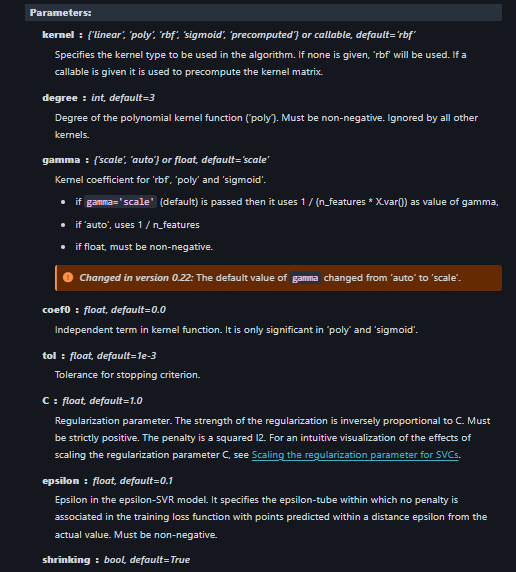

In [55]:
from sklearn.svm  import SVR

In [56]:
# 
svr = SVR(kernel = 'linear', C = 1400)

In [57]:
svr.fit(standardized_x_train, y_train)

SVR(C=1400, kernel='linear')

In [58]:
y_train_predicted = svr.predict(standardized_x_train)
y_test_predicted = svr.predict(standardized_x_test)
y_test_predicted

array([37944.48919096, 51752.75446125, 45560.48132042, 32415.8133041 ,
       46450.45806124, 48196.17493635, 44701.07737119, 41869.59386963,
       43704.6893915 , 61687.97595555, 39192.61816336, 37660.23553753,
       62620.9341262 , 54731.17489454, 41311.00277026, 25334.13966901,
       40899.25625377, 32983.38906657, 33489.05340663, 49053.95841485,
       35596.0943815 , 45220.99417182, 50555.95364808, 31843.38164484,
       34910.07434654, 57887.79642893, 45833.75839433, 30273.80753344,
       41796.95775628, 59345.98428736, 56364.93793758, 46037.32602314,
       30171.24155824, 40826.58000499, 31591.60317636, 41008.70268731,
       43538.75328211, 41759.01442751, -4649.29590758, 53472.69425445,
       55942.32073917, 42213.87461338, 41066.59831086, 39643.16002973,
       51988.68301353, 41518.01226253, 40609.03626546, 28573.54424951,
       42887.42990774, 54712.49027826, 51357.65503406, 61190.88401391,
       33057.012063  , 32915.16382597, 42564.15354774, 18992.29500195,
      

In [59]:
from sklearn.metrics import mean_squared_error, r2_score

In [60]:
mean_squared_error(y_test, y_test_predicted)

np.float64(98271865.42829321)

In [61]:
r2_score(y_train, y_train_predicted)

0.6866458933880888

In [62]:
r2_score(y_test, y_test_predicted)

0.61594423060177